In [2]:
import numpy as np
from pkrr import PKRR
from math import *
import matplotlib.pyplot as plt

In [3]:
from data_datasets import higgs, susy, cod_rna
# data = "susy"
# data = "higgs"
data = "cod_rna"
####################
N = 10000
seed=123

if data == "higgs":
    X_train, X_test, y_train, y_test = higgs(N, seed=123)
elif data == "susy":
    X_train, X_test, y_train, y_test = susy(N, seed=123)
elif data == "cod_rna":
    X_train, X_test, y_train, y_test = cod_rna(N, seed=123)

print("\nDataset:", data)
print("--------\nShape train data:", X_train.shape)
print("Shape test data:", X_test.shape)


Dataset: cod_rna
--------
Shape train data: (10000, 8)
Shape test data: (10000, 8)


# Fix rank and gamma and vary mu

In [3]:
gamma = 0.005
rank =50

colors = ['red', 'green', 'blue', 'yellow', 'orange', "black"]
methods = ["cg", "rff", "nystrom", "uniform", "greedy", "rpc"]

param_name = "mu"
mu_list = [0.0001, 0.001, 0.01, 0.1, 1]
mu_list

[0.0001, 0.001, 0.01, 0.1, 1]

cg done!
rff done!
nystrom done!
uniform done!
greedy done!
rpc done!


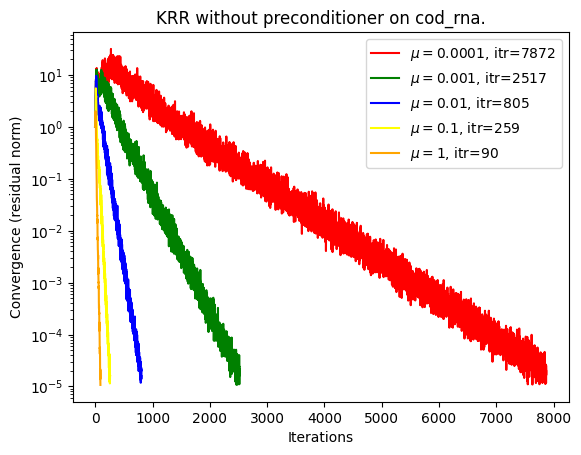

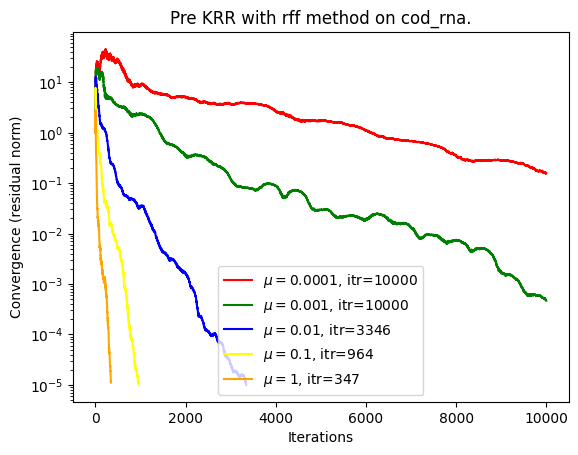

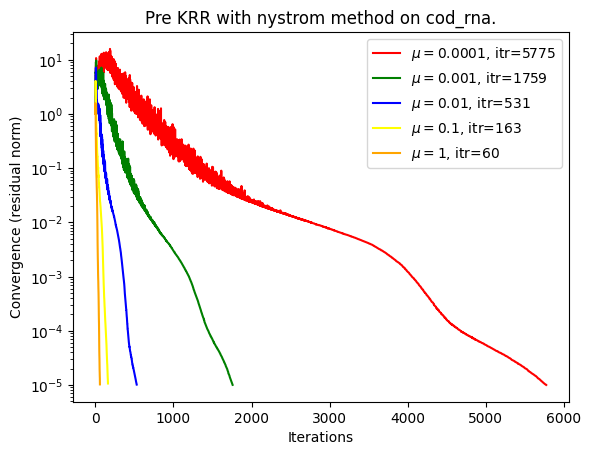

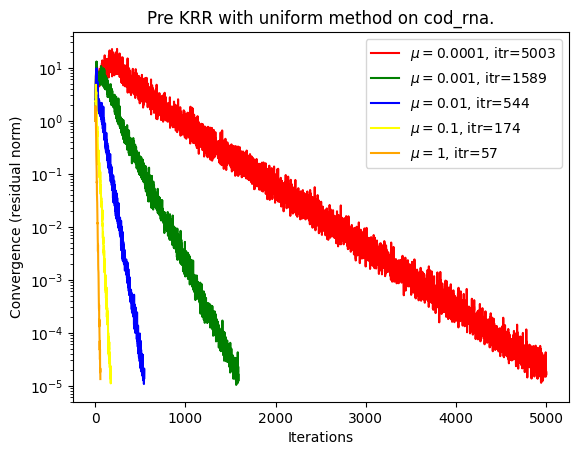

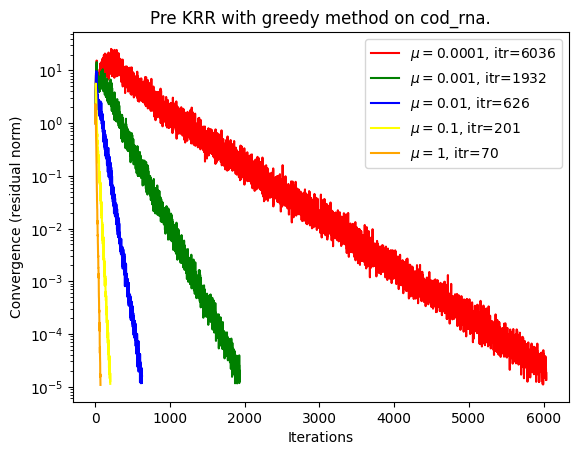

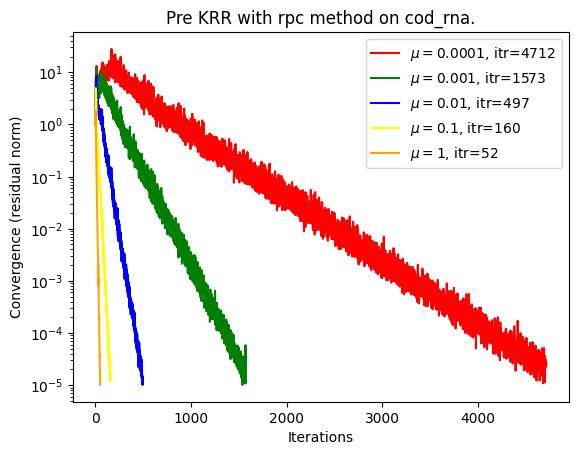

In [4]:
for method in methods:
    fig, ax = plt.subplots()
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Convergence (residual norm)')

    models_residuals = []
    if (method=="cg"):
        pre_name=None
        ax.set_title(f'KRR without preconditioner on {data}.')
    else:
        pre_name=method
        ax.set_title(f'Pre KRR with {method} method on {data}.')

    for i, mu in enumerate(mu_list):
        model = PKRR(mu=mu, rank=rank, gamma=gamma, prec=pre_name)
        model.fit(X_train=X_train, y_train=y_train)
        m_res = model.residuals
        ax.semilogy(range(len(m_res)), m_res,
                    color=colors[i], label=r'$\mu=$'+f"{mu}, itr={len(m_res)}")

    ax.legend()
    # plt.show()
    print(f"{method} done!")
    plt.savefig(f'img/{data}_{param_name}_{method}.png', bbox_inches='tight')

In [5]:
rank = 50
mu = 1e-4

colors = ['red', 'green', 'blue', 'yellow', 'orange', "black"]
methods = ["cg", "rff", "nystrom", "uniform", "greedy", "rpc"]

param_name = "gamma"
gamma_list = [0.01, 0.1, 1, 10, 50]
gamma_list

[0.01, 0.1, 1, 10, 50]

cg done!
rff done!
nystrom done!
uniform done!
greedy done!
rpc done!


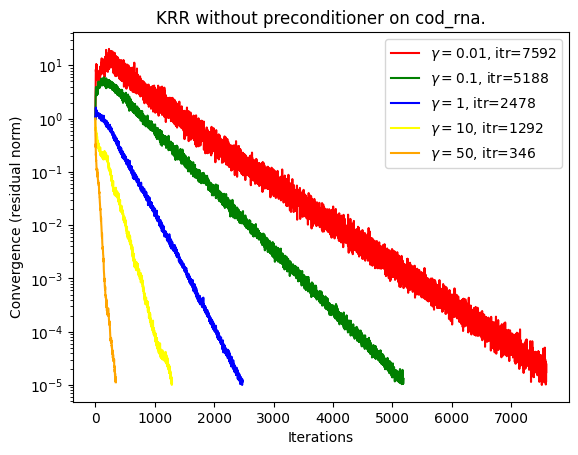

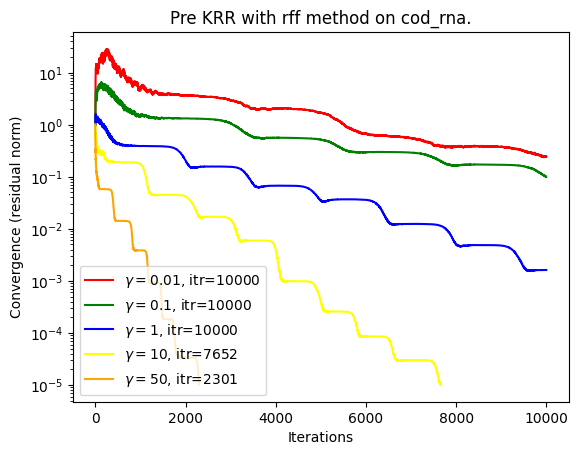

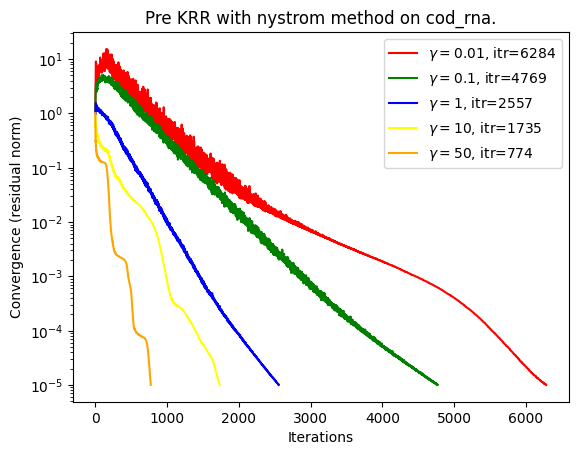

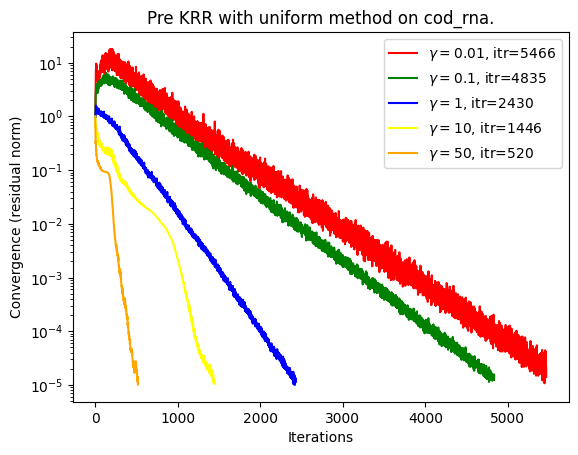

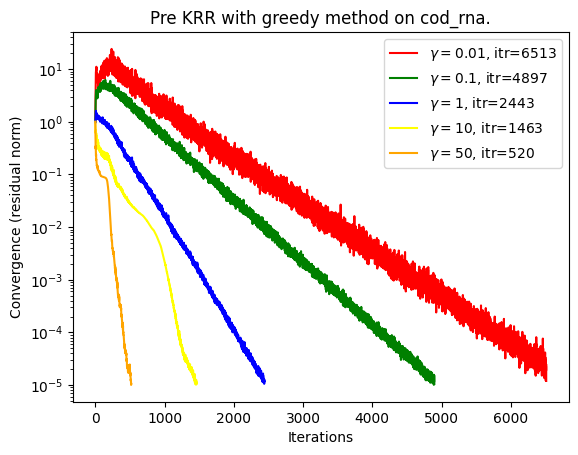

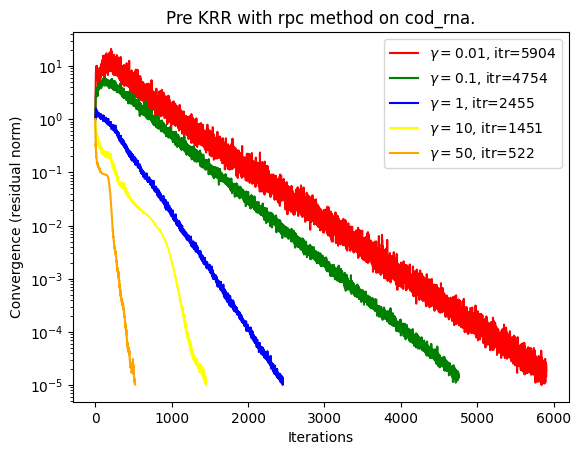

In [6]:
for method in methods:
    fig, ax = plt.subplots()
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Convergence (residual norm)')
    ax.set_title(f'Pre KRR with {method} method.')

    models_residuals = []
    
    if (method=="cg"):
        pre_name=None
        ax.set_title(f'KRR without preconditioner on {data}.')
    else:
        pre_name=method
        ax.set_title(f'Pre KRR with {method} method on {data}.')

    for i, gamma in enumerate(gamma_list):
        model = PKRR(mu=mu, gamma=gamma, prec=pre_name, rank=rank)
        model.fit(X_train=X_train, y_train=y_train)
        m_res = model.residuals
        ax.semilogy(range(len(m_res)), m_res,
                    color=colors[i], label=r'$\gamma=$'+f"{gamma}, itr={len(m_res)}")

    ax.legend()
    # plt.show()
    print(f"{method} done!")
    plt.savefig(f'img/{data}_{param_name}_{method}.png', bbox_inches='tight')

In [6]:
mu = 0.01
gamma = 0.1
rank = 50

fig, ax = plt.subplots()
ax.set_xlabel('Iterations')
ax.set_ylabel('Convergence (residual norm)')
ax.set_title(f'Compare Pre KRR methods. (' +
             r'$\mu=$'+f"{mu}"+r'$\gamma=$'+f"{gamma}"+f"rank={rank})")


methods = [None, "greedy",  "uniform", "nystrom", "rpc", "rff"]
models_residuals = []
colors = ['red', 'green', 'blue', 'yellow', 'orange', "black"]

for i, method in enumerate(methods):
    if method is None:
        prec = method
    model = PKRR(mu=mu, rank=rank, prec=method, gamma=gamma)
    model.fit(X_train=X_train, y_train=y_train)
    m_res = model.residuals
    method_name = "CG" if method == None else method
    ax.semilogy(range(len(m_res)), m_res,
                colors[i], label=f"{method_name} - itr={len(m_res)}")
    print(model.report)

ax.legend()

# plt.show()
plt.savefig(f'img/{data}_compare.png', bbox_inches='tight')

Training is done in 502 iteration with CG-method. Precondition: without precondition
Training is done in 473 iteration with CG-method. Precondition: greedy
Training is done in 470 iteration with CG-method. Precondition: uniform
Training is done in 484 iteration with CG-method. Precondition: nystrom
